In [25]:
import numpy as np
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

### 1.a)

Registros con y1
520
Registros con y2
480


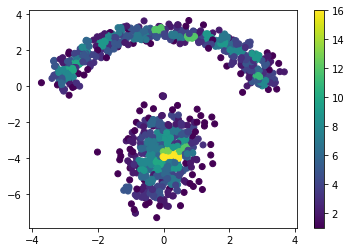

In [49]:
import numpy as np
import matplotlib.pyplot as plt
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)


print("Registros con y1")
print( len(y1) )
print("Registros con y2")
print( len(y2) )


equis=X[:,0]
ii=X[:,1]

hist, xedges, yedges = np.histogram2d(equis, ii,30)
xidx = np.clip(np.digitize(equis, xedges) - 1, 0, hist.shape[0] - 1)
yidx = np.clip(np.digitize(ii, yedges) - 1, 0, hist.shape[1] - 1)
c = hist[xidx, yidx]
plt.scatter(equis, ii, c=c)

plt.colorbar()
plt.show()



In [30]:
import matplotlib.pyplot as plt
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

### 1.b)

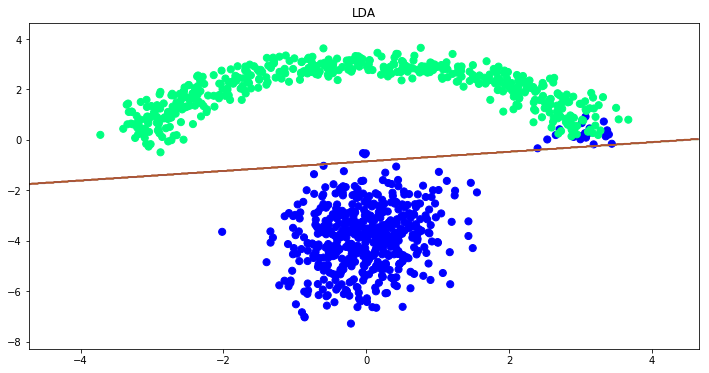

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
model.fit(X,y)
visualize_border(model,X,y,"LDA")